In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df_60 = titanic.sample(frac=0.60, random_state=42)
df_40 = titanic.drop(df_60.index)

In [10]:
df_60

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
439,0,2,male,31.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
840,0,3,male,20.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
720,1,2,female,6.0,0,1,33.0000,S,Second,child,False,NaN,Southampton,yes,False
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,male,44.0,2,0,90.0000,Q,First,man,True,C,Queenstown,no,False
740,1,1,male,NaN,0,0,30.0000,S,First,man,True,D,Southampton,yes,True
602,0,1,male,NaN,0,0,42.4000,S,First,man,True,NaN,Southampton,no,True
768,0,3,male,NaN,1,0,24.1500,Q,Third,man,True,NaN,Queenstown,no,False


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_60['age'] = sc.fit_transform(df_60[['age']])
df_60['fare'] = sc.fit_transform(df_60[['fare']])
df_60['sibsp'] = sc.fit_transform(df_60[['sibsp']])
df_60

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,1.239171,3,male,NaN,0.547434,0.736772,-0.380956,C,Third,man,True,NaN,Cherbourg,yes,False
439,-0.806991,2,male,0.082279,-0.502305,-0.495019,-0.490262,S,Second,man,True,NaN,Southampton,no,True
840,-0.806991,3,male,-0.666987,-0.502305,-0.495019,-0.549570,S,Third,man,True,NaN,Southampton,no,True
720,1.239171,2,female,-1.620600,-0.502305,0.736772,0.027961,S,Second,child,False,NaN,Southampton,yes,False
39,1.239171,3,female,-1.075678,0.547434,-0.495019,-0.473179,C,Third,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.806991,1,male,0.967776,1.597172,-0.495019,1.340794,Q,First,man,True,C,Queenstown,no,False
740,1.239171,1,male,NaN,-0.502305,-0.495019,-0.041135,S,First,man,True,D,Southampton,yes,True
602,-0.806991,1,male,NaN,-0.502305,-0.495019,0.244464,S,First,man,True,NaN,Southampton,no,True
768,-0.806991,3,male,NaN,0.547434,-0.495019,-0.175873,Q,Third,man,True,NaN,Queenstown,no,False


<Axes: xlabel='age', ylabel='fare'>

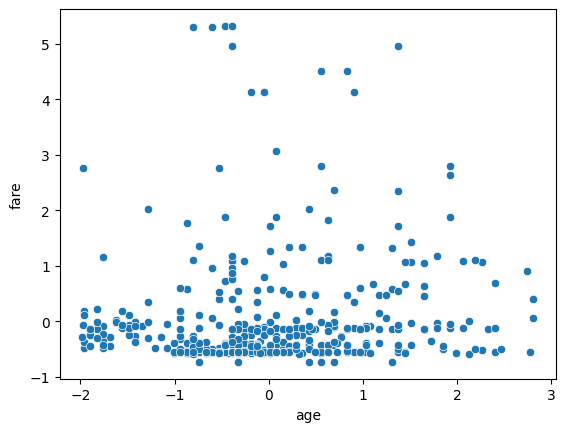

In [21]:
sns.scatterplot(x='age',y='fare',data=df_60)    

##Classification

In [24]:
features = ["pclass", "sex", "age", "fare", "sibsp", "parch", "embarked"]
target = "survived"

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_40["age"].fillna(df_40["age"].median(), inplace=True)
df_40["fare"].fillna(df_40["fare"].median(), inplace=True)
df_40["embarked"].fillna(df_40["embarked"].mode()[0], inplace=True)

df_40["sex"] = LabelEncoder().fit_transform(df_40["sex"])
df_40["embarked"] = LabelEncoder().fit_transform(df_40["embarked"])

C:\Users\user\AppData\Local\Temp\ipykernel_8288\1879283822.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_40["age"].fillna(df_40["age"].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8288\1879283822.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [26]:
X = df_40[features]
y = df_40[target]


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.87      0.72      0.79        18

    accuracy                           0.90        72
   macro avg       0.89      0.84      0.86        72
weighted avg       0.90      0.90      0.90        72

